##Data Loading

In [1]:
# Access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import pandas
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/grants.csv'
grants_df = pd.read_csv(file_path)

# Display the first few rows
print("First few rows of the dataset:")
grants_df.head()

First few rows of the dataset:


,Unnamed: 0,opportunity_id,opportunity_title,opportunity_number,opportunity_category,funding_instrument_type,category_of_funding_activity,cfda_numbers,eligible_applicants,eligible_applicants_type,...,post_date,close_date,last_updated_date,archive_date,award_ceiling,award_floor,estimated_total_program_funding,expected_number_of_awards,cost_sharing_or_matching_requirement,additional_information_url
0,0,262148,Establishment of the Edmund S. Muskie Graduate...,SCAPPD-14-AW-161-SCA-08152014,Discretionary,Cooperative Agreement,Other,19.040,Others,Non-Government Organization,...,2014-08-15,2014-09-04,2014-08-20,2014-10-04,600000.0,400000.0,600000.0,1.0,False,NaN
1,1,262308,Health and resiliency of salt marshes in Jamai...,NPS-14-NERO-0119,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-18,2014-08-23,2014-08-18,2014-08-24,275897.0,275897.0,275897.0,1.0,False,NaN
2,2,262368,Post-Hurricane Sandy submerged marine habitat ...,NPS-14-NERO-0125,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-19,2014-08-24,2014-08-19,2014-08-25,480000.0,480000.0,480000.0,1.0,False,NaN
3,3,262390,Inventory and Monitoring of Amphibians and Rep...,NPS-14-NERO-0087,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,...,2014-08-19,2014-08-24,2014-08-19,2014-08-25,255577.0,255577.0,255577.0,1.0,False,NaN
4,4,131594,Youth Leadership Program with Algeria,ECA-PE-C-PY-12-09,Discretionary,Cooperative Agreement,Other,19.415,Others,Non-Government Organization,...,2011-11-21,2012-01-04,2011-11-21,2012-01-05,250000.0,NaN,250000.0,1.0,True,http://exchanges.state.gov/grants/open2.html


##Initial Data Exploration

In [3]:
# Display basic information about the dataset
print("Dataset Information:")
grants_df.info()

# Check for missing values and summary statistics
print("\nSummary Statistics:")
grants_df.describe()

print("\nMissing Values Count:")
print(grants_df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75640 entries, 0 to 75639
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            75640 non-null  int64  
 1   opportunity_id                        75640 non-null  int64  
 2   opportunity_title                     75640 non-null  object 
 3   opportunity_number                    75640 non-null  object 
 4   opportunity_category                  75640 non-null  object 
 5   funding_instrument_type               75640 non-null  object 
 6   category_of_funding_activity          75640 non-null  object 
 7   cfda_numbers                          74815 non-null  float64
 8   eligible_applicants                   75640 non-null  object 
 9   eligible_applicants_type              75640 non-null  object 
 10  agency_code                           75597 non-null  object 

##Data Cleaning

In [4]:
# Drop irrelevant columns
grants_df = grants_df.drop(columns=['Unnamed: 0', 'additional_information_url'])
print("Dropped irrelevant columns.")

Dropped irrelevant columns.


In [5]:
# Fill categorical columns with "Unknown"
grants_df['agency_code'] = grants_df['agency_code'].fillna("Unknown")
grants_df['agency_name'] = grants_df['agency_name'].fillna("Unknown")
grants_df['cfda_numbers'] = grants_df['cfda_numbers'].fillna("Unknown")

# Fill numeric columns with median values
grants_df['award_ceiling'] = grants_df['award_ceiling'].fillna(grants_df['award_ceiling'].median())
grants_df['award_floor'] = grants_df['award_floor'].fillna(grants_df['award_floor'].median())
grants_df['estimated_total_program_funding'] = grants_df['estimated_total_program_funding'].fillna(grants_df['estimated_total_program_funding'].median())
grants_df['expected_number_of_awards'] = grants_df['expected_number_of_awards'].fillna(grants_df['expected_number_of_awards'].median())

print("Missing values handled without inplace warnings.")

Missing values handled without inplace warnings.


##Basic Exploratory Data Analysis

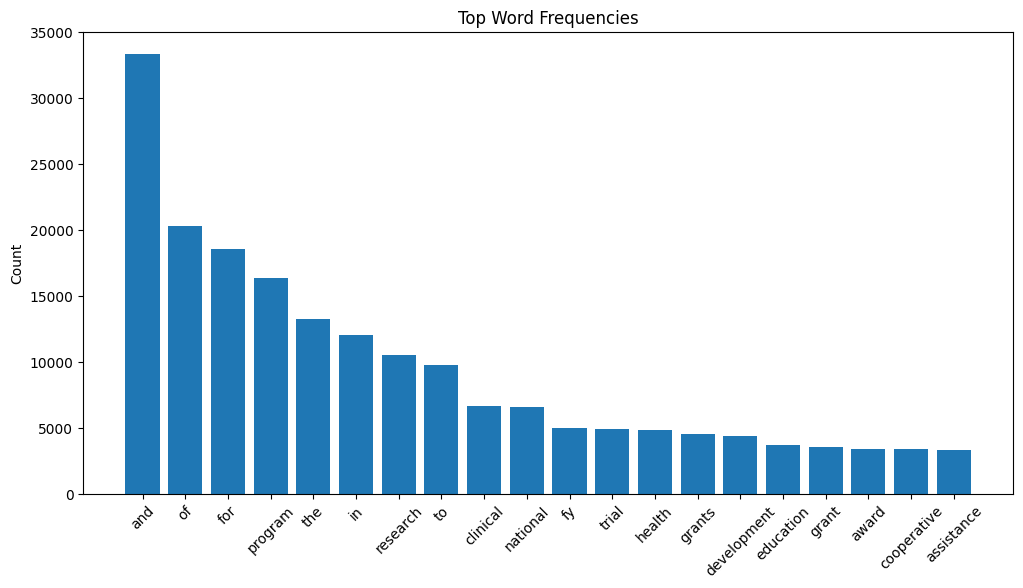

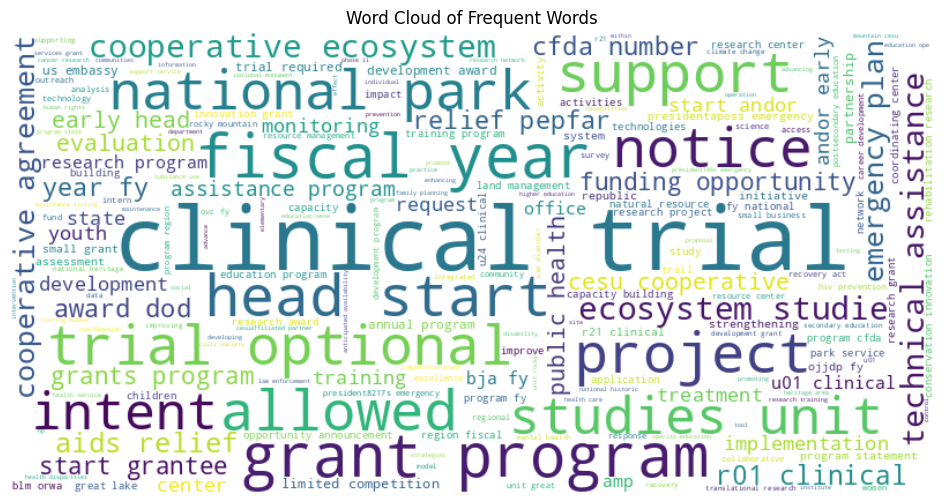

In [6]:
# Import libraries for word frequency analysis
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define function for word frequency analysis
def plot_word_frequency(corpus, top_n=20):
    """
    Generate and display a bar chart for the most common words in the corpus.
    Also display a word cloud.

    Parameters:
    corpus (list of str): List of preprocessed text documents.
    top_n (int): Number of top words to visualize.
    """
    # Flatten corpus into single list of words
    all_words = ' '.join(corpus).split()
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(top_n)

    # Bar chart for most common words
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title('Top Word Frequencies')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

    # Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Frequent Words')
    plt.show()

# Preprocess opportunity_title column and analyze
cleaned_text = grants_df['opportunity_title'].dropna().str.lower().str.replace('[^\w\s]', '', regex=True).str.split()
cleaned_text = [' '.join(doc) for doc in cleaned_text]  # Join lists into single strings
plot_word_frequency(cleaned_text, top_n=20)

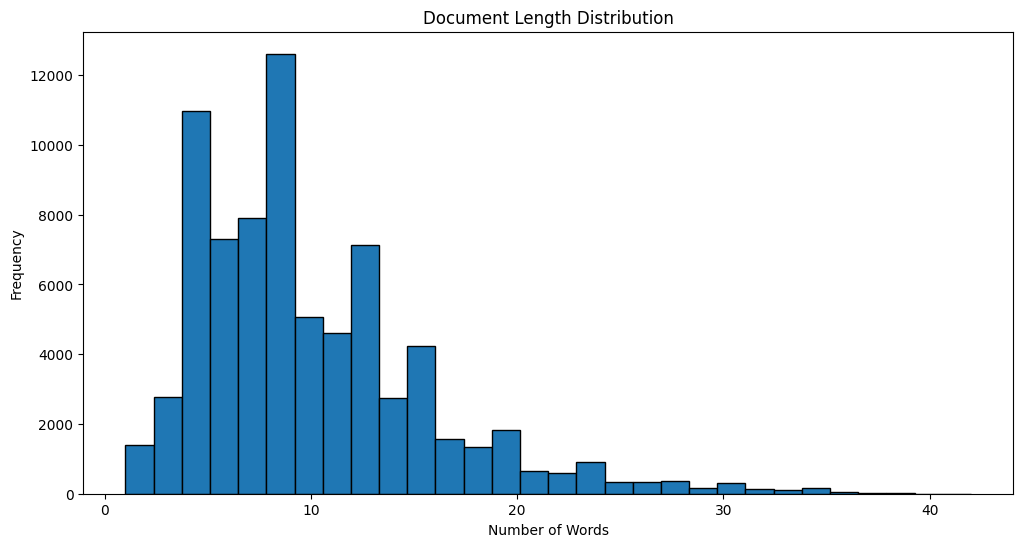

In [7]:
# Import libraries for document length distribution
import matplotlib.pyplot as plt

# Define function to plot document length distribution
def plot_document_length_distribution(corpus):
    """
    Plot the distribution of document lengths in terms of the number of words.

    Parameters:
    corpus (list of str): List of preprocessed text documents.
    """
    # Calculate document lengths
    document_lengths = [len(doc.split()) for doc in corpus]

    # Plot distribution
    plt.figure(figsize=(12, 6))
    plt.hist(document_lengths, bins=30, edgecolor='black')
    plt.title('Document Length Distribution')
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()

plot_document_length_distribution(cleaned_text)


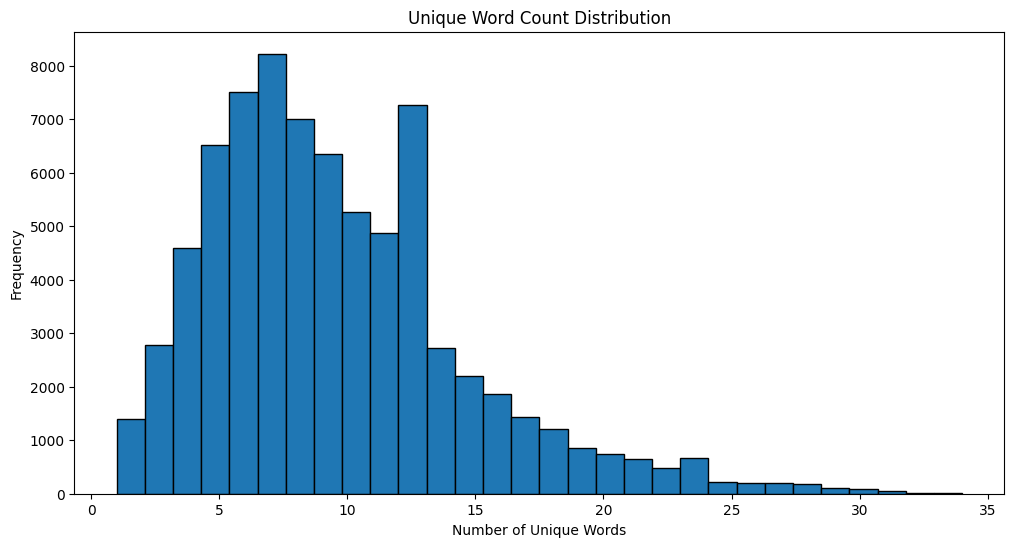

In [8]:
# Define function to plot unique word count distribution
def plot_unique_word_count_distribution(corpus):
    """
    Plot the distribution of unique word counts per document.

    Parameters:
    corpus (list of str): List of preprocessed text documents.
    """
    # Calculate unique word counts
    unique_word_counts = [len(set(doc.split())) for doc in corpus]

    # Plot distribution
    plt.figure(figsize=(12, 6))
    plt.hist(unique_word_counts, bins=30, edgecolor='black')
    plt.title('Unique Word Count Distribution')
    plt.xlabel('Number of Unique Words')
    plt.ylabel('Frequency')
    plt.show()

plot_unique_word_count_distribution(cleaned_text)

In [9]:
# Convert date columns to datetime format
date_columns = ['post_date', 'close_date', 'last_updated_date', 'archive_date']
for col in date_columns:
    grants_df[col] = pd.to_datetime(grants_df[col], errors='coerce')

# Drop rows where essential date fields are missing
grants_df = grants_df.dropna(subset=['close_date', 'archive_date'])
print("Date columns converted and essential missing dates handled.")

Date columns converted and essential missing dates handled.


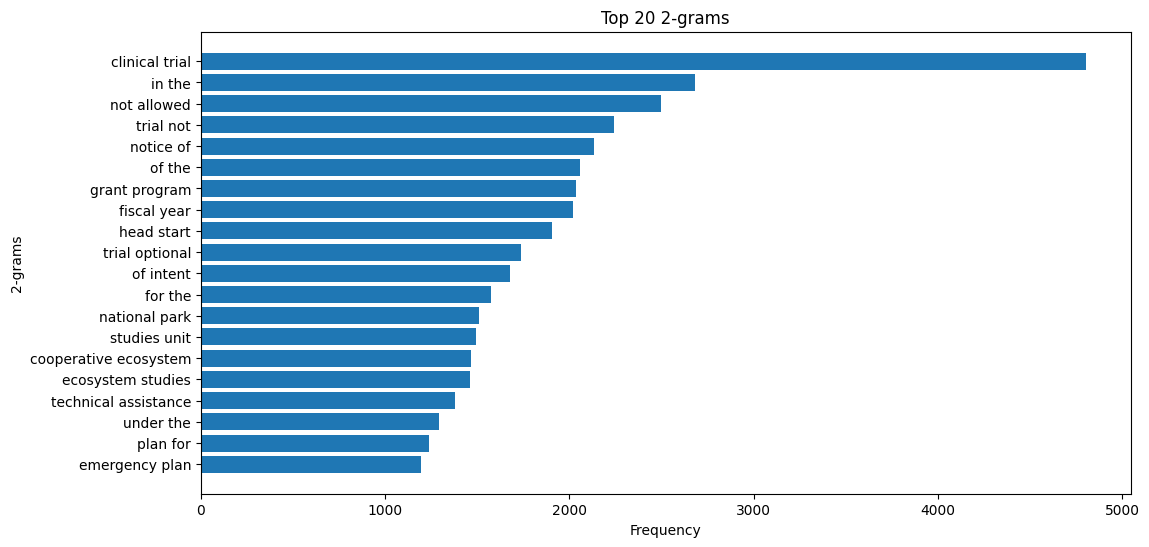

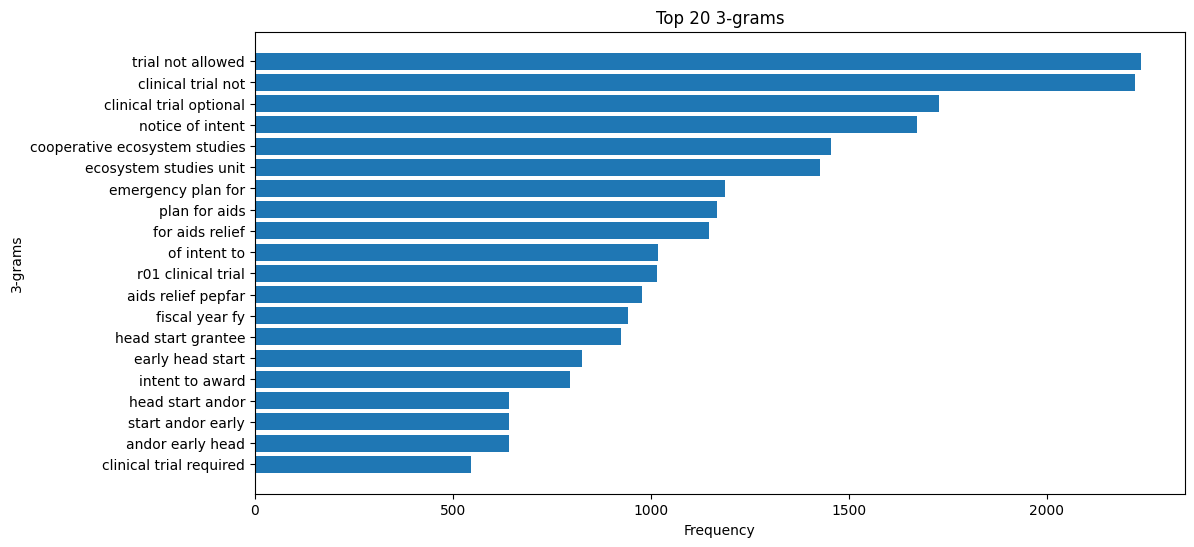

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Define function to plot top N n-grams
def plot_top_ngrams(corpus, n=2, top_n=20):
    """
    Plot the most common n-grams in the corpus.

    Parameters:
    corpus (list of str): List of preprocessed text documents.
    n (int): N-gram size (e.g., 2 for bigrams, 3 for trigrams).
    top_n (int): Number of top n-grams to display.
    """
    # Create n-gram vectorizer
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngram_matrix = vectorizer.fit_transform(corpus)

    # Sum up n-gram occurrences
    ngram_counts = ngram_matrix.sum(axis=0)
    ngram_freq = [(word, ngram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:top_n]

    # Convert to DataFrame for visualization
    ngram_df = pd.DataFrame(ngram_freq, columns=['N-gram', 'Frequency'])

    # Plot top n-grams
    plt.figure(figsize=(12, 6))
    plt.barh(ngram_df['N-gram'], ngram_df['Frequency'])
    plt.title(f'Top {top_n} {n}-grams')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-grams')
    plt.gca().invert_yaxis()  # Invert y-axis to read easier
    plt.show()

plot_top_ngrams(cleaned_text, n=2, top_n=20)
plot_top_ngrams(cleaned_text, n=3, top_n=20)

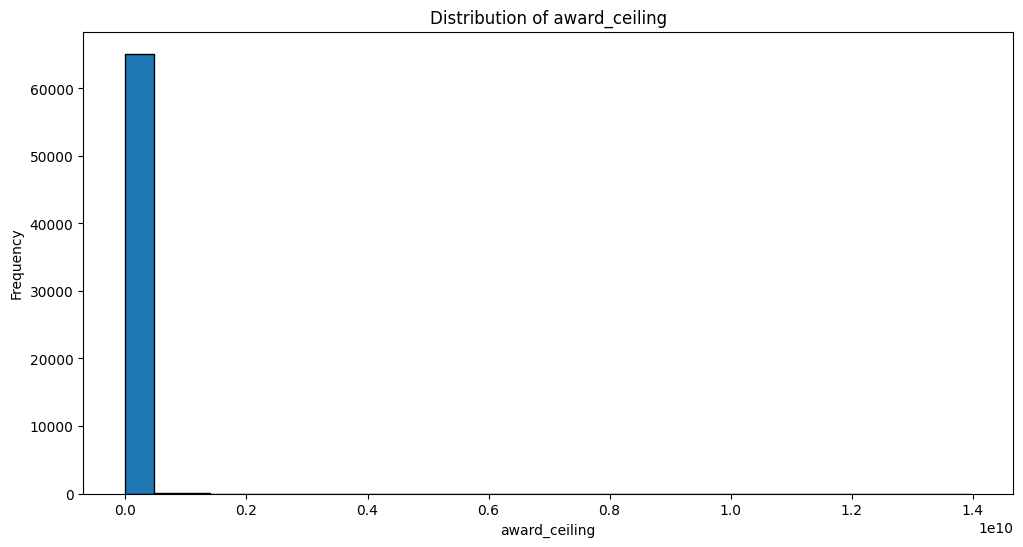

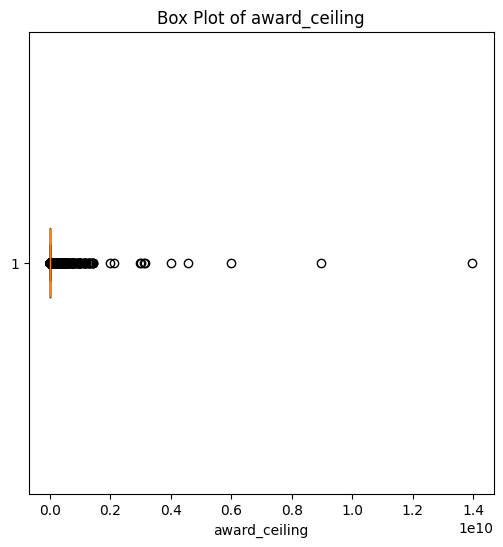

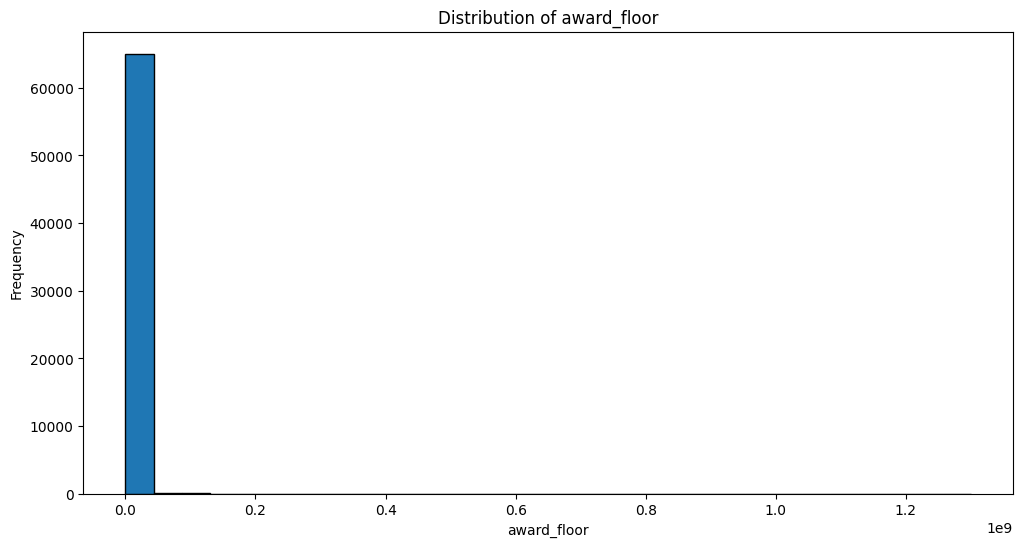

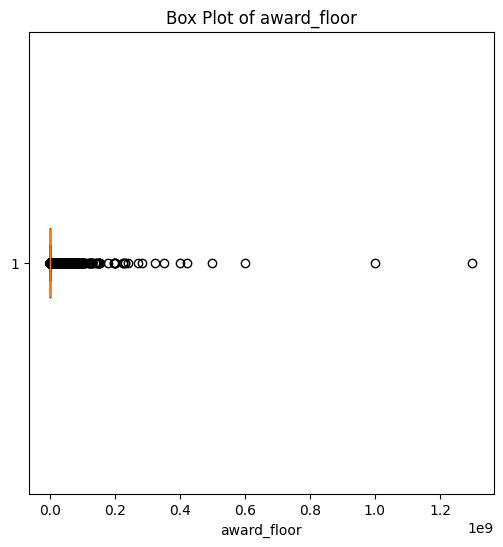

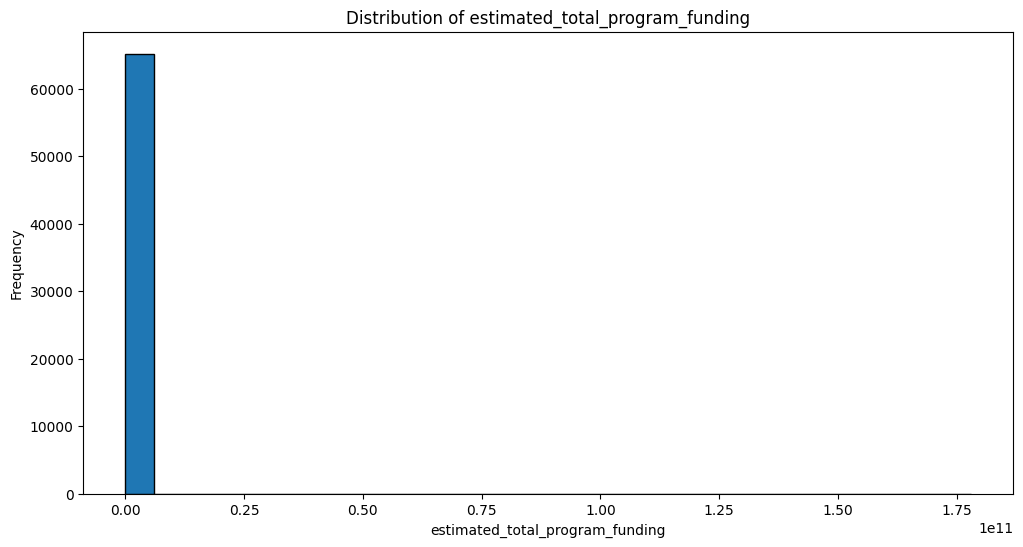

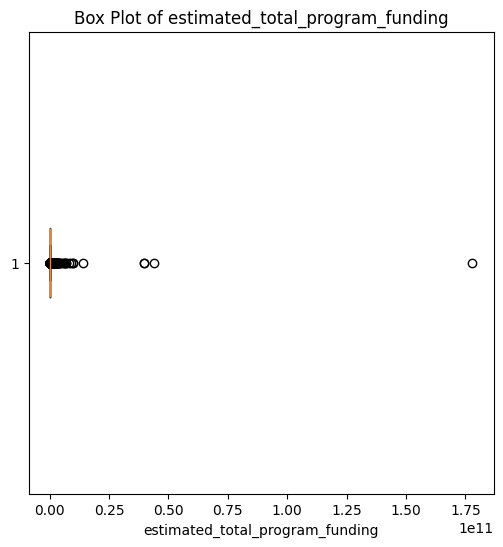

In [11]:
# Define function to analyze numeric variable distributions
def plot_numeric_distributions(df, columns):
    """
    Plot histograms and box plots for numeric variables.

    Parameters:
    df (pd.DataFrame): The DataFrame containing numeric columns.
    columns (list of str): List of column names to analyze.
    """
    for column in columns:
        if column in df.columns:
            # Histogram
            plt.figure(figsize=(12, 6))
            plt.hist(df[column].dropna(), bins=30, edgecolor='black')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()

            # Box plot
            plt.figure(figsize=(6, 6))
            plt.boxplot(df[column].dropna(), vert=False)
            plt.title(f'Box Plot of {column}')
            plt.xlabel(column)
            plt.show()

numeric_columns = ['award_ceiling', 'award_floor', 'estimated_total_program_funding']
plot_numeric_distributions(grants_df, numeric_columns)

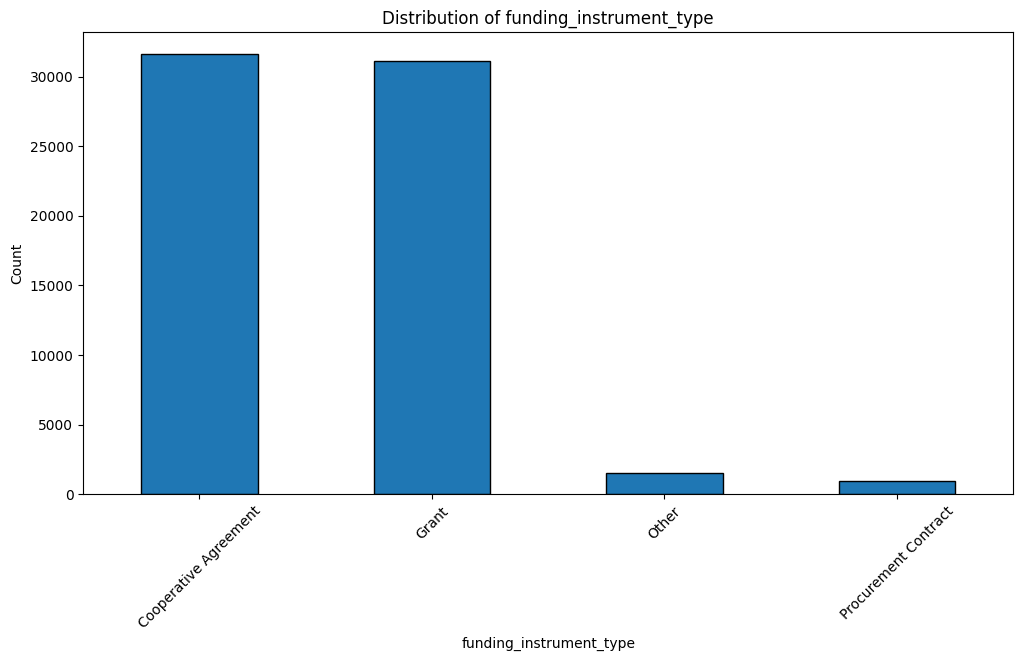

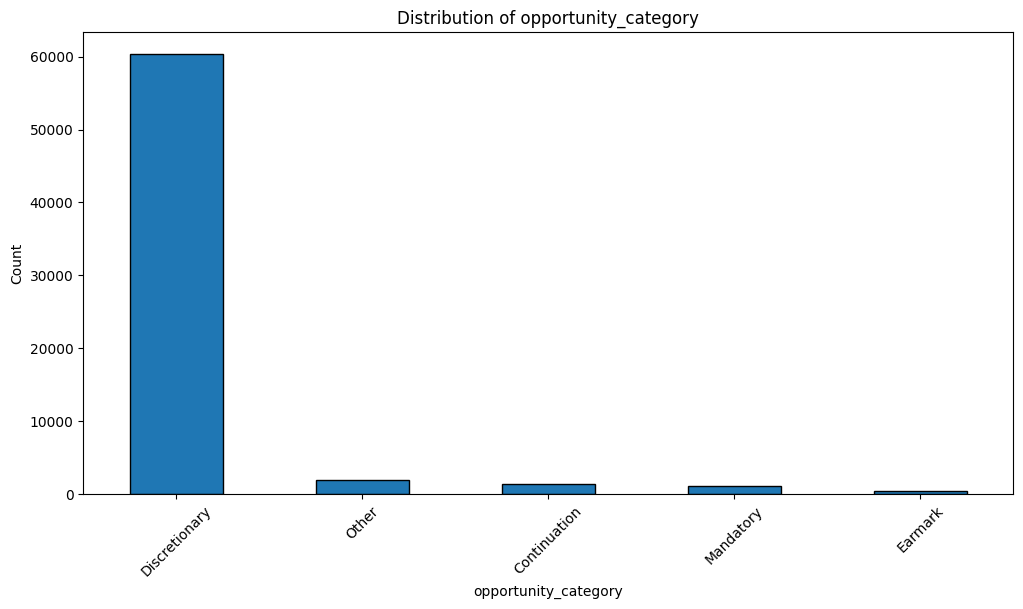

In [12]:
# Define function to analyze categorical variable distributions
def plot_categorical_distributions(df, columns):
    """
    Plot bar charts for categorical variables.

    Parameters:
    df (pd.DataFrame): The DataFrame containing categorical columns.
    columns (list of str): List of column names to analyze.
    """
    for column in columns:
        if column in df.columns:
            # Frequency distribution
            plt.figure(figsize=(12, 6))
            df[column].value_counts().plot(kind='bar', edgecolor='black')
            plt.title(f'Distribution of {column}')
            plt.xlabel(column)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.show()

categorical_columns = ['funding_instrument_type', 'opportunity_category']
plot_categorical_distributions(grants_df, categorical_columns)

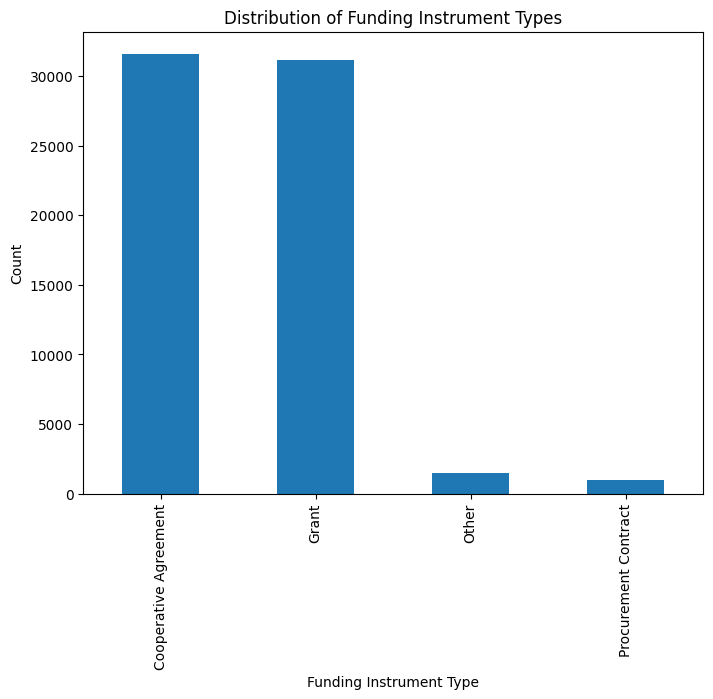

In [13]:
import matplotlib.pyplot as plt

# Plot the distribution of funding instrument types
plt.figure(figsize=(8,6))
grants_df['funding_instrument_type'].value_counts().plot(kind='bar')
plt.title('Distribution of Funding Instrument Types')
plt.xlabel('Funding Instrument Type')
plt.ylabel('Count')
plt.show()

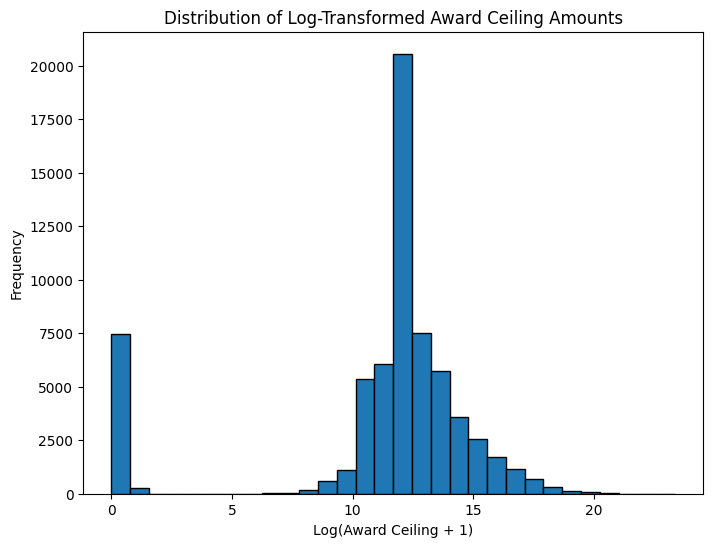

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation (adding 1 to avoid log(0))
plt.figure(figsize=(8,6))
np.log1p(grants_df['award_ceiling']).dropna().plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution of Log-Transformed Award Ceiling Amounts')
plt.xlabel('Log(Award Ceiling + 1)')
plt.ylabel('Frequency')
plt.show()

##Save the Cleaned Data

In [15]:
# Save the cleaned data to Google Drive
output_path_drive = '/content/drive/MyDrive/cleaned_grants.csv'
grants_df.to_csv(output_path_drive, index=False)
print(f"Cleaned dataset saved to Google Drive at {output_path_drive}")

Cleaned dataset saved to Google Drive at /content/drive/MyDrive/cleaned_grants.csv
